In [ ]:
import sys
import numpy as np
import pandas as pd
import time
from collections import namedtuple
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
from matplotlib import pyplot as plt, patches


sys.path.append("c:\\Users\\wun2\\github\\AutoOSS_20251126")


from scipy.spatial.distance import cdist as cdist
import numpy as np
from scipy.optimize import linear_sum_assignment
import matplotlib.pyplot as plt



from scipy.spatial import distance

from AutoOSS.action_modules.scan_module import ScanModule
from AutoOSS.action_modules.diss_module import DissModule
from AutoOSS.action_modules.move_module import MoveModule


from AutoOSS.action_modules.assem_module.path_planning import astar_fast, rrt_star, rrt

from Modules.assem_modules.assemble import get_path_from_rl
    




# Test various manipulations

In [ ]:
nano_control=nanonisController()  # Initialize the nanonis controller instance

scan_action=ScanModule(nano_control)
diss_action=DissModule(nano_control)
move_action=MoveModule(nano_control)

Dissociation tip position set to: (2.926742626030432, 2.926742626030432) nm


In [ ]:
print('####### Starting Scan Action 2 ####### ')

scan_params_default={"Scan_speed": 300,                      # Scan speed in nm/s
        "Scan_bias": 1.0,                      # Sample bias in V
        "Scan_current": 0.002,                   # Tunneling current in nA
        "Scan_size_w": 20,                      # Scan size in nm
        "Scan_size_h": 20,                      # Scan size in nm
        "Scan_save_name": "before_"
}

scan_action.update_params(params_dict=scan_params_default)
scan_action.perform_single_scan()

print('####### Starting Diss Action 3 ####### ')

diss_params={"Diss_bias": 2.0,                      # Dissociation bias in V
        "Diss_current": 0.005,                   # Dissociation current in nA
        "Diss_height": 0.0,                      # Dissociation height in nm
        "Diss_mode": 'Constant Current',         # Dissociation mode: 'Constant Height
        "Diss_save_name": "molecule"
}


diss_action.update_params(params_dict=diss_params, print_params=True)
diss_action.perform_single_diss()


print('####### Starting Scan Action 4 ####### ')

scan_action.update_params(params_dict=scan_params_default)


print('####### Starting Move Action 2 #######  move to position at 45 degrees angle from reference point')

move_params={"Move_speed":  1.2,          # Move speed in nm/s
        "Move_ref_dist_angle": 45,   
        "Move_save_name": "angle_45"           
}

move_action.update_params(params_dict=move_params)
move_action.perform_single_move()


print('####### Starting Scan Action 3 #######  move to position')

scan_params_default={"Scan_speed": 300,                      # Scan speed in nm/s
        "Scan_bias": 1.0,                      # Sample bias in V
        "Scan_current": 0.002,                   # Tunneling current in nA
        "Scan_size_w": 20,                      # Scan size in nm
        "Scan_size_h": 20,                      # Scan size in nm
        "Scan_save_name": "after_"
}

# Plot path-planning result

(0.0, 20.0)

<Figure size 300x300 with 0 Axes>

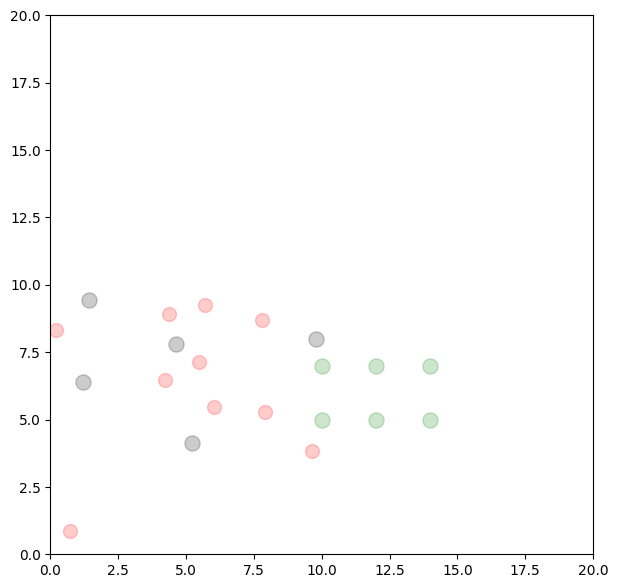

In [ ]:


np.random.seed(0)

plt.figure(figsize=(3, 3))
all_mols_pos = np.random.rand(10,2)*10

obstacles_pos=np.random.rand(5,2)*10


# Grid arrangement
design_mols_pos = []
for i in range(3):
    for j in range(2):
        design_mols_pos.append([i*2+10, j*2+5])
design_mols_pos = np.array(design_mols_pos)

# Plotting ---------------------------------------
plt.figure(figsize=(7, 7))

# Original molecules
plt.scatter(all_mols_pos[:, 0], all_mols_pos[:, 1],
            s=100, c='red', label="Initial molecules", alpha=0.2)
# Original obstacles_pos
plt.scatter(obstacles_pos[:, 0], obstacles_pos[:, 1],
            s=120, c='black', label="Static obstacles_pos", alpha=0.2)

# Design targets
plt.scatter(design_mols_pos[:, 0], design_mols_pos[:, 1],
            s=120, c='green', label="Targets", alpha=0.2)



bounds = (0, 20, 0, 20)

plt.xlim(bounds[0], bounds[1])
plt.ylim(bounds[2], bounds[3])



In [4]:
start=all_mols_pos[7]
goal=design_mols_pos[4]
obstacles=np.array([list(obstacles_pos[i]) + [1] for i in range(len(obstacles_pos))])
bounds=10 # Example bounds, adjust as needed

In [ ]:
a_star_path=astar_fast(start, goal, obstacles,
                       step_size=2.0, grid_size=0.2, bound_margin=10, goal_threshold=0.5)      # max movement per step 


rrt_path=rrt(start, goal, obstacles,
                       step_size=2.0, bound_margin=10, goal_threshold=0.5, max_iter=2000)

rrt_star_path=rrt_star(start, goal, obstacles, step_size=2.0, bound_margin=10, goal_threshold=0.5, max_iter=2000)

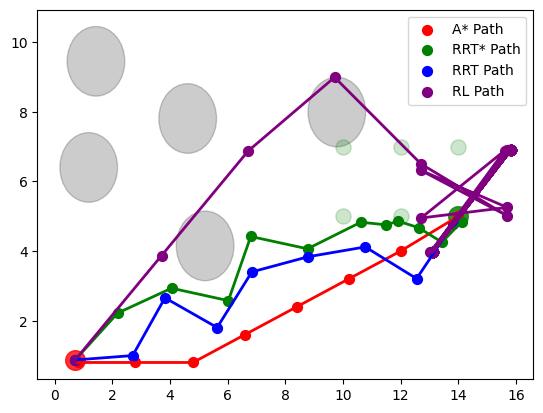

In [25]:
Circle = patches.Circle
for obs in obstacles:
    circle = Circle((obs[0], obs[1]), obs[2], color='black', alpha=0.2)
    plt.gca().add_patch(circle)

# Design targets
plt.scatter(design_mols_pos[:, 0], design_mols_pos[:, 1],
            s=120, c='green', alpha=0.2)


plt.scatter(start[0], start[1], s=200, c='red',  alpha=0.8)

plt.scatter(goal[0], goal[1], s=200, c='green', alpha=0.8)


plt.scatter(np.array(a_star_path)[:, 0], np.array(a_star_path)[:, 1], s=50, color='red', label='A* Path')
plt.scatter(np.array(rrt_star_path)[:, 0], np.array(rrt_star_path)[:, 1], s=50, color='green', label='RRT* Path')

plt.scatter(np.array(rrt_path)[:, 0], np.array(rrt_path)[:, 1], s=50, color='blue', label='RRT Path')

plt.scatter(np.array(rl_path)[:, 0], np.array(rl_path)[:, 1], s=50, color='purple', label='RL Path')

plt.plot(np.array(a_star_path)[:, 0], np.array(a_star_path)[:, 1], linewidth=2, color='red')
plt.plot(np.array(rrt_star_path)[:, 0], np.array(rrt_star_path)[:, 1], linewidth=2, color='green')

plt.plot(np.array(rrt_path)[:, 0], np.array(rrt_path)[:, 1], linewidth=2, color='blue')
plt.plot(np.array(rl_path)[:, 0], np.array(rl_path)[:, 1], linewidth=2, color='purple')

plt.legend()